# ASSIGNMENT 1 - IMPORT

1.1 - Importare le librerie necessarie

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/abalone_new.csv

--2022-04-26 18:10:53--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/abalone_new.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 3.5.244.121
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|3.5.244.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211611 (207K) [text/csv]
Saving to: ‘abalone_new.csv’

abalone_new.csv     100%[===================>] 206.65K   663KB/s    in 0.3s    

2022-04-26 18:10:55 (663 KB/s) - ‘abalone_new.csv’ saved [211611/211611]



1.2 - Caricare il dataset 'abalone_new.csv'. Il dataset riguarda delle conchiglie (le cosiddette 'orecchie di mare'). Lo scopo di questa analisi è quello di creare dei modelli capaci di predire il numero di anelli ('Rings') basandosi sulle altre features.

In [6]:
df = pd.read_csv('abalone_new.csv')

In [7]:
df.head()

,Unnamed: 0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4177 non-null   int64  
 1   Sex             4175 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4175 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole weight    4177 non-null   float64
 6   Shucked weight  4177 non-null   float64
 7   Viscera weight  4154 non-null   float64
 8   Shell weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


27

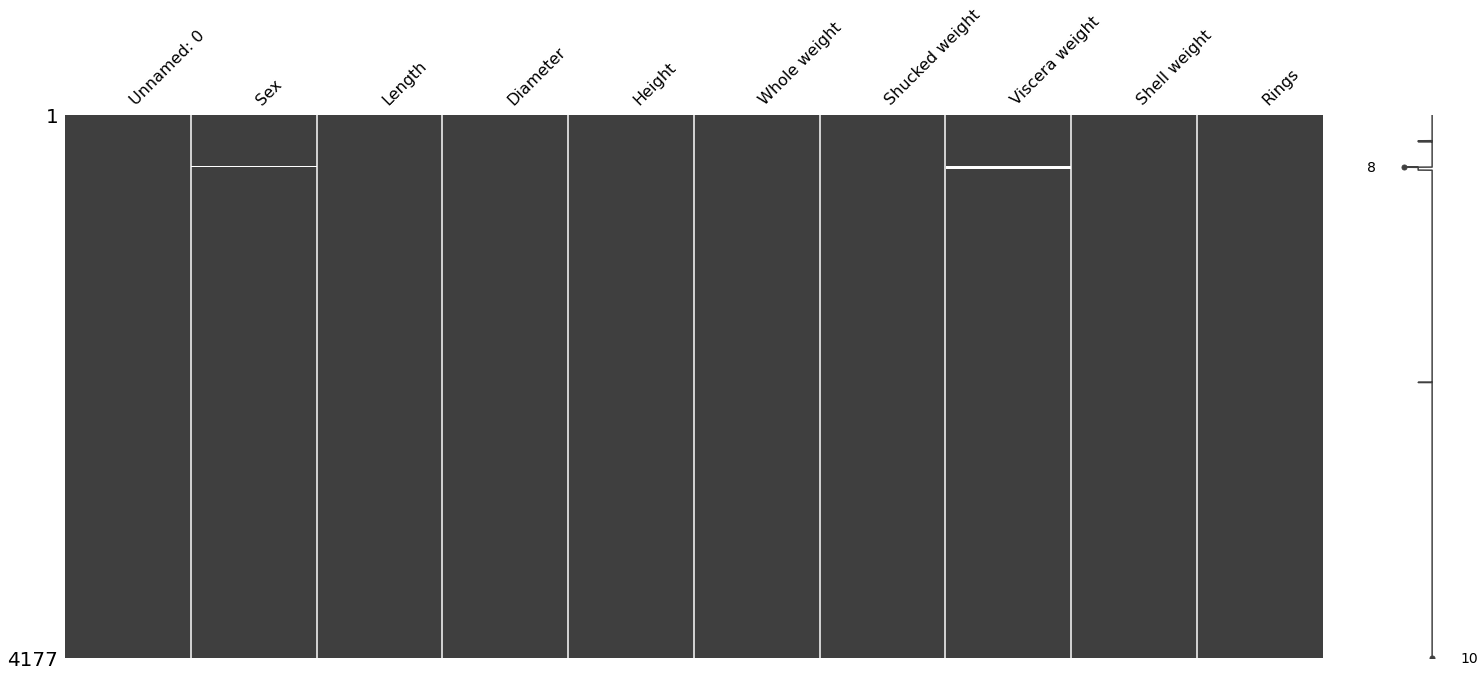

In [9]:
import missingno as msno   
msno.matrix(df)
df.isnull().sum().sum()

In [10]:
def missing_values_table(df):
        mis_val = df.isnull().sum()                                                 # Total missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)                         # Percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)               # Make a table with the results
        mis_val_table_ren_columns = mis_val_table.rename(                           # Rename the columns
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[                      # Sort the table by percentage of missing descending
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"    # Print some summary information   
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [11]:
missing= missing_values_table(df)
missing

Your selected dataframe has 10 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Viscera weight,23,0.6
Sex,2,0.0
Diameter,2,0.0


In [12]:
df = df.drop('Unnamed: 0', axis=1)

In [13]:
df['Viscera weight'].value_counts()

0.1715    14
0.1960    14
0.0370    13
0.0575    13
0.0610    13
          ..
0.3605     1
0.4305     1
0.4915     1
0.0020     1
0.5260     1
Name: Viscera weight, Length: 880, dtype: int64

In [14]:
df['Sex'].value_counts()

M    1528
I    1341
F    1306
Name: Sex, dtype: int64

In [15]:
df['Diameter'].value_counts()

0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.610      1
0.650      1
0.620      1
0.095      1
0.615      1
Name: Diameter, Length: 111, dtype: int64

In [16]:
df['Viscera weight'] = df['Viscera weight'].fillna(df['Viscera weight'].mean())

In [17]:
df['Diameter'] = df['Diameter'].fillna(df['Diameter'].mean())

In [18]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [19]:
df['Sex']=df['Sex'].fillna("M") 

In [20]:
df['Sex'].value_counts()

M    1530
I    1341
F    1306
Name: Sex, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.6150,0.8150
Diameter,4177.0,0.407903,0.099234,0.0550,0.3500,0.4250,0.4800,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.1650,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.1530,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.5020,1.4880
Viscera weight,4177.0,0.180543,0.109438,0.0005,0.0935,0.1710,0.2525,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.3290,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.0000,29.0000


In [23]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# ASSIGNMENT 2 - TRAIN_TEST_SPLIT

2.1 - Eseguire un train/test split mischindo i dati e lasciando al test set il 25% dei record

In [24]:
train_df, test_df = train_test_split(df, shuffle=True, test_size=0.25, random_state=22)

# ASSIGNMENT 3 - EDA

3.1 - Performare una EDA comprensiva e che metta in luce le principali caratteristiche delle variabili, utilizzando le tecniche che abbiamo visto durante il corso: scatterplot, boxplot, matrice di correlazione e pairplot. Supportare i grafici con delle osservazioni scritte di spiegazione e descrizione.

###ESPLORAZIONE DEL TARGET

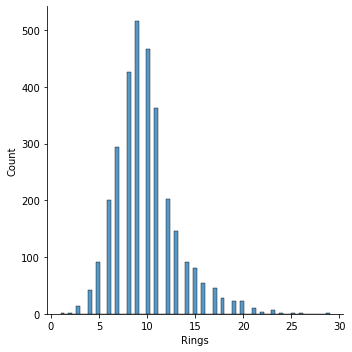

In [25]:
target_name = 'Rings'
sns.displot(train_df[target_name],height =5,aspect=1)

In [26]:
print("Skewness:",train_df["Rings"].skew())
print("Kurtosis:",train_df["Rings"].kurt())

Skewness: 1.0770445854103725
Kurtosis: 2.1599543357158457


###Dal plot del Target si può notare che la distribuzione dei valori è abbastanza simmetrica, con un moderato prolungamento della coda verso destra

In [27]:
#Numerical Features
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,5))
    sns.histplot(x = col_data, kde=True, ax=ax[0], color = 'purple')
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median()})
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.show()

In [28]:
numerical_cols = ['Length',	'Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight']

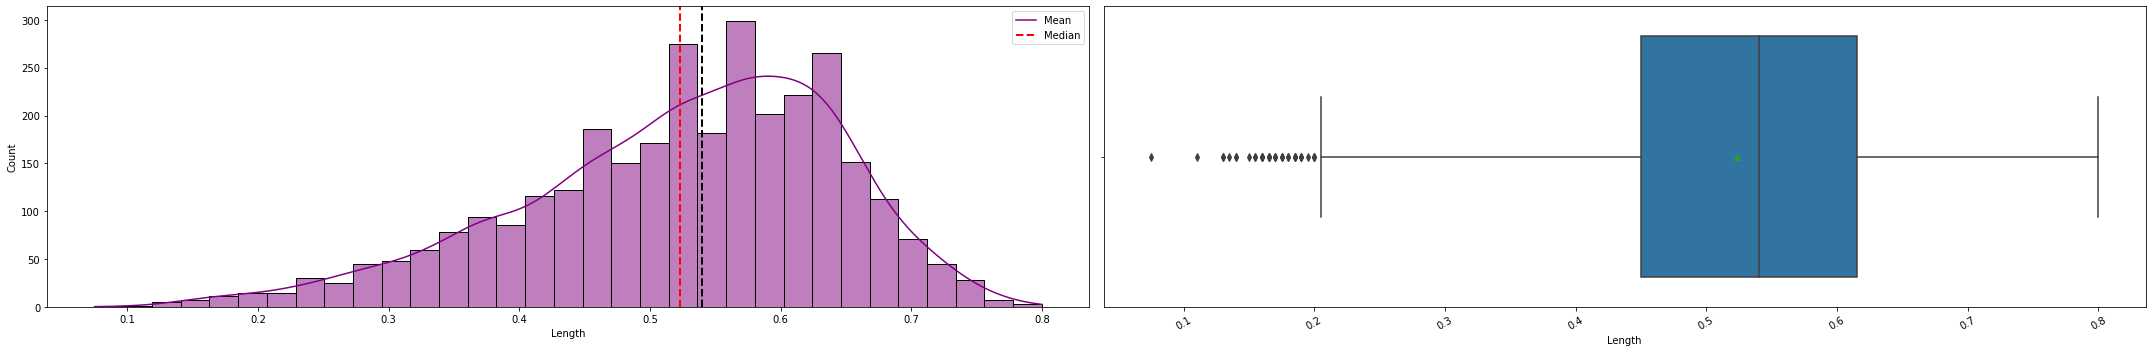

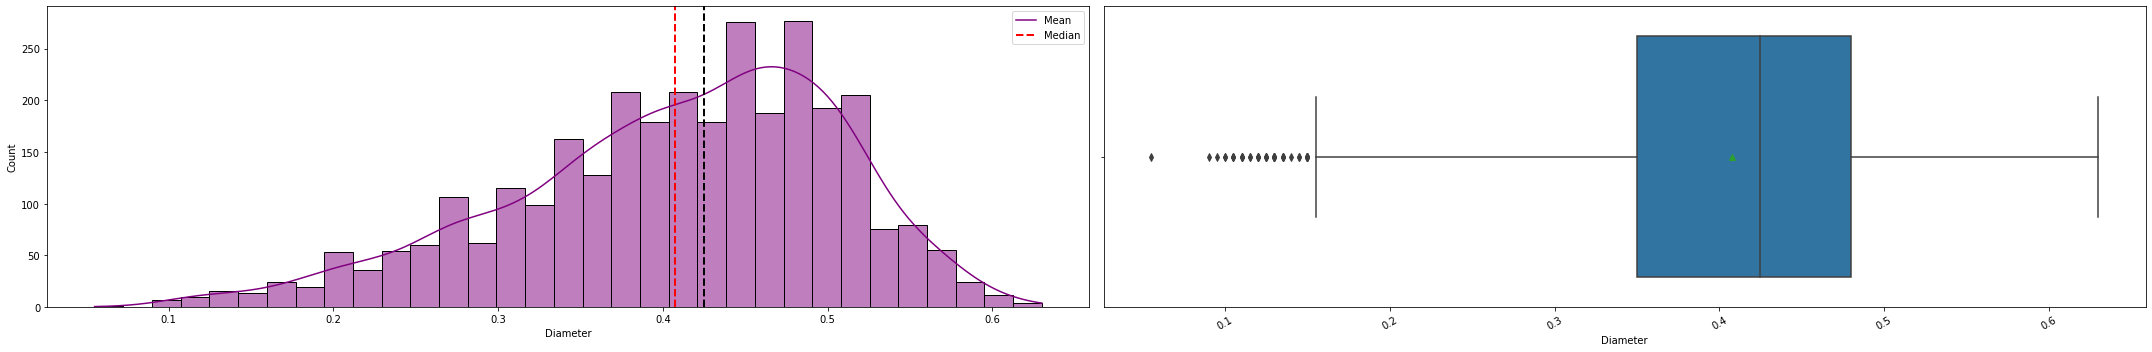

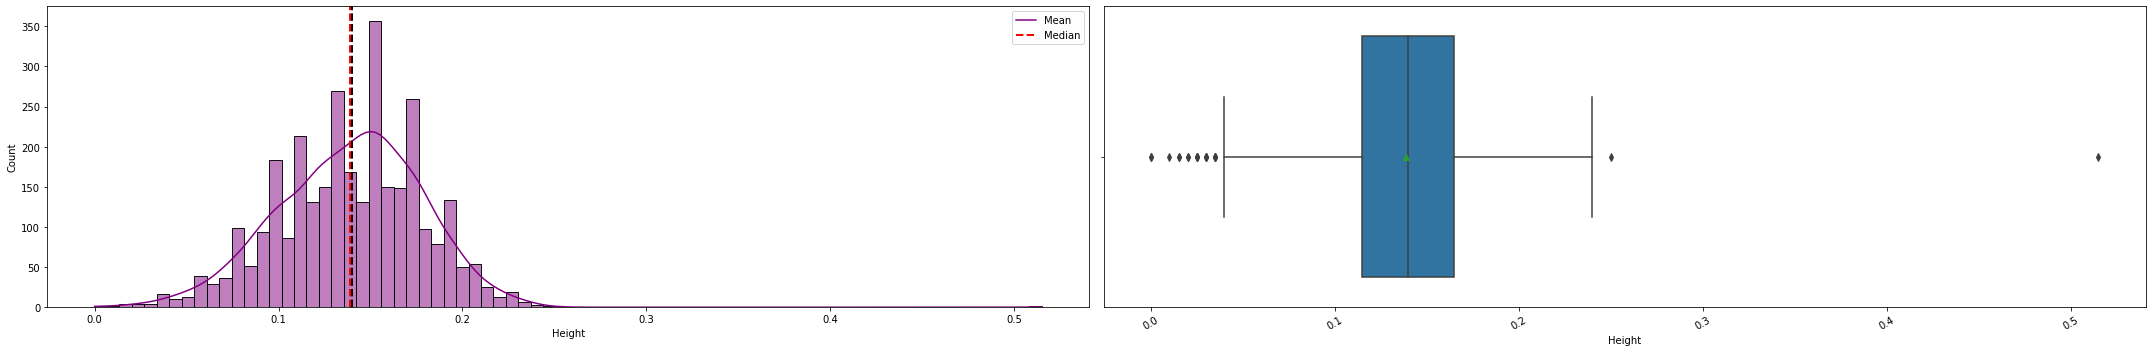

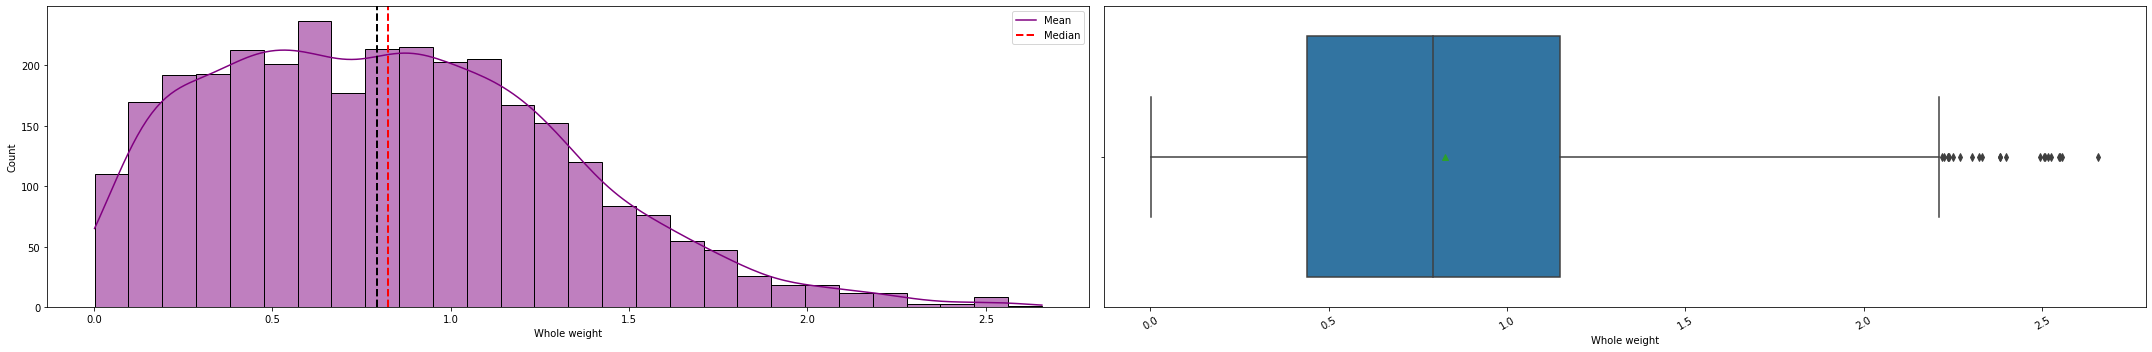

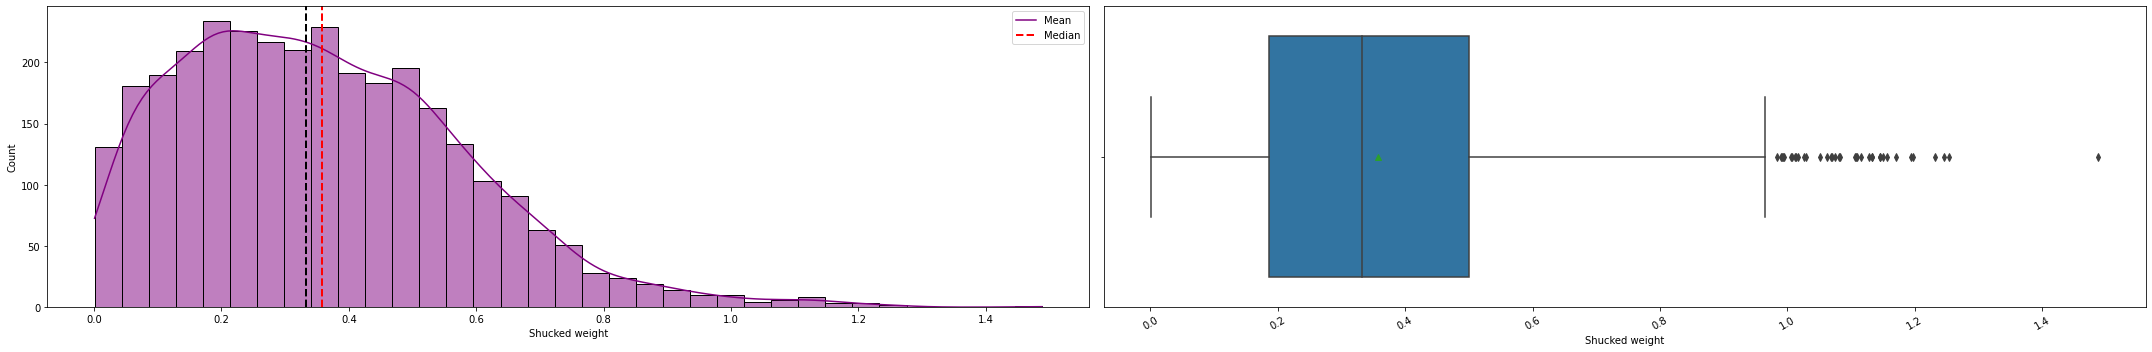

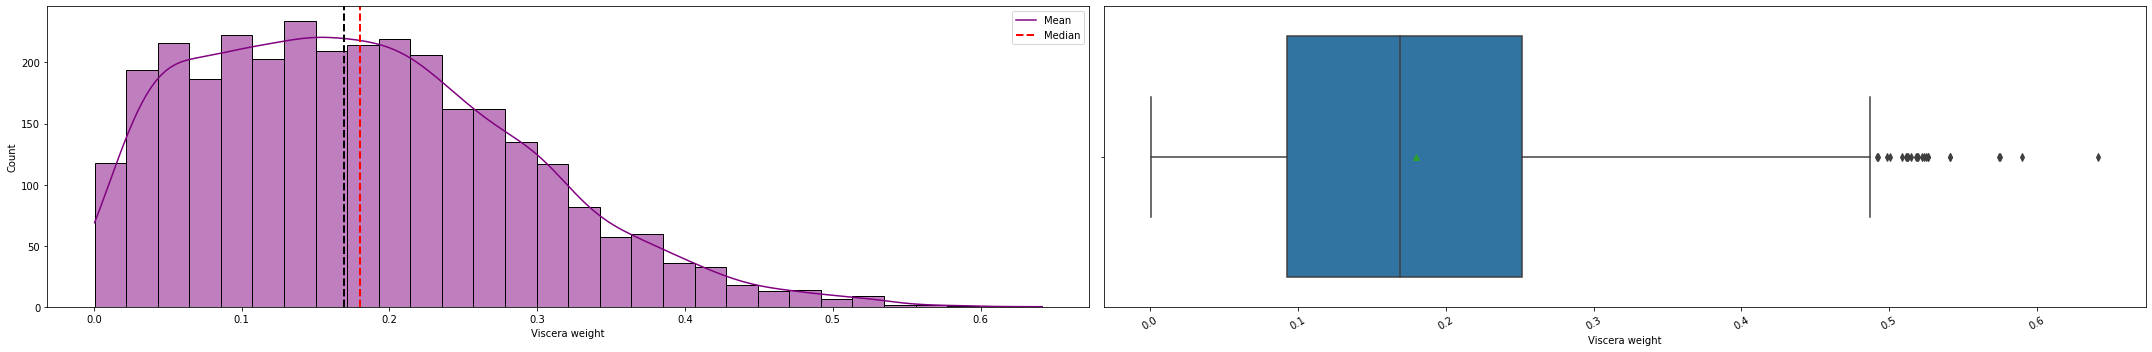

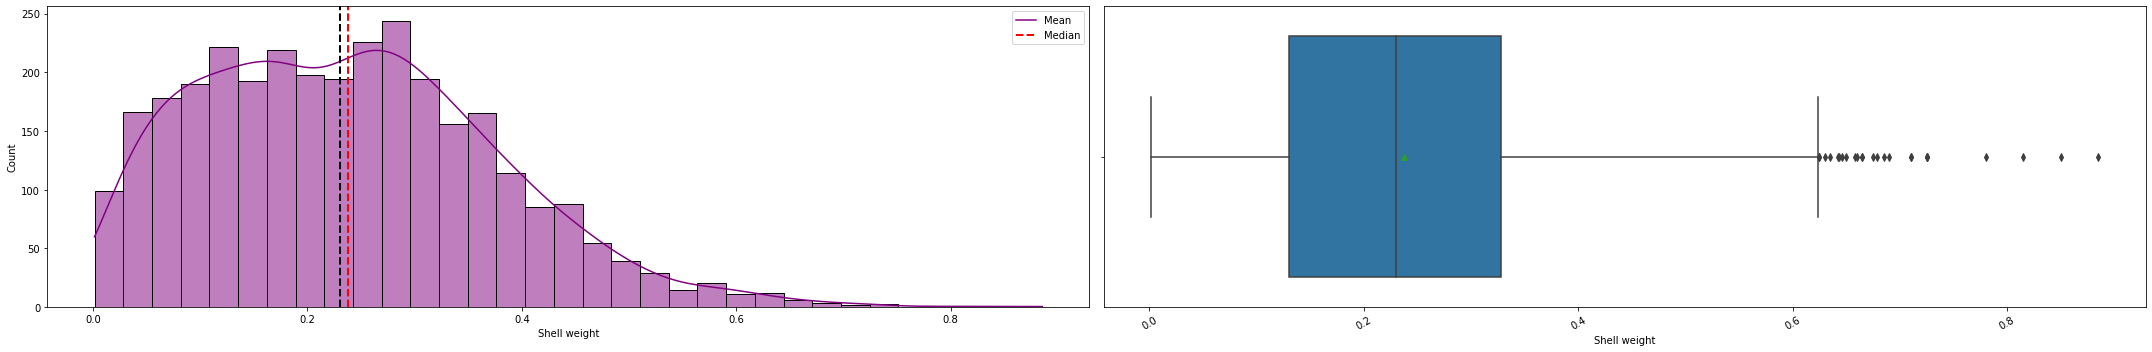

In [29]:
for i in numerical_cols:
    num_feat(train_df[i])

###Possiamo vedere che ogni variabile numerica ha delle caratteristiche ben precise, alcune presentano una coda verso destra (le variabile che misurano altezza e peso) , mentre quelle che misurano diametro e lunghezza presentano una coda verso sinistra

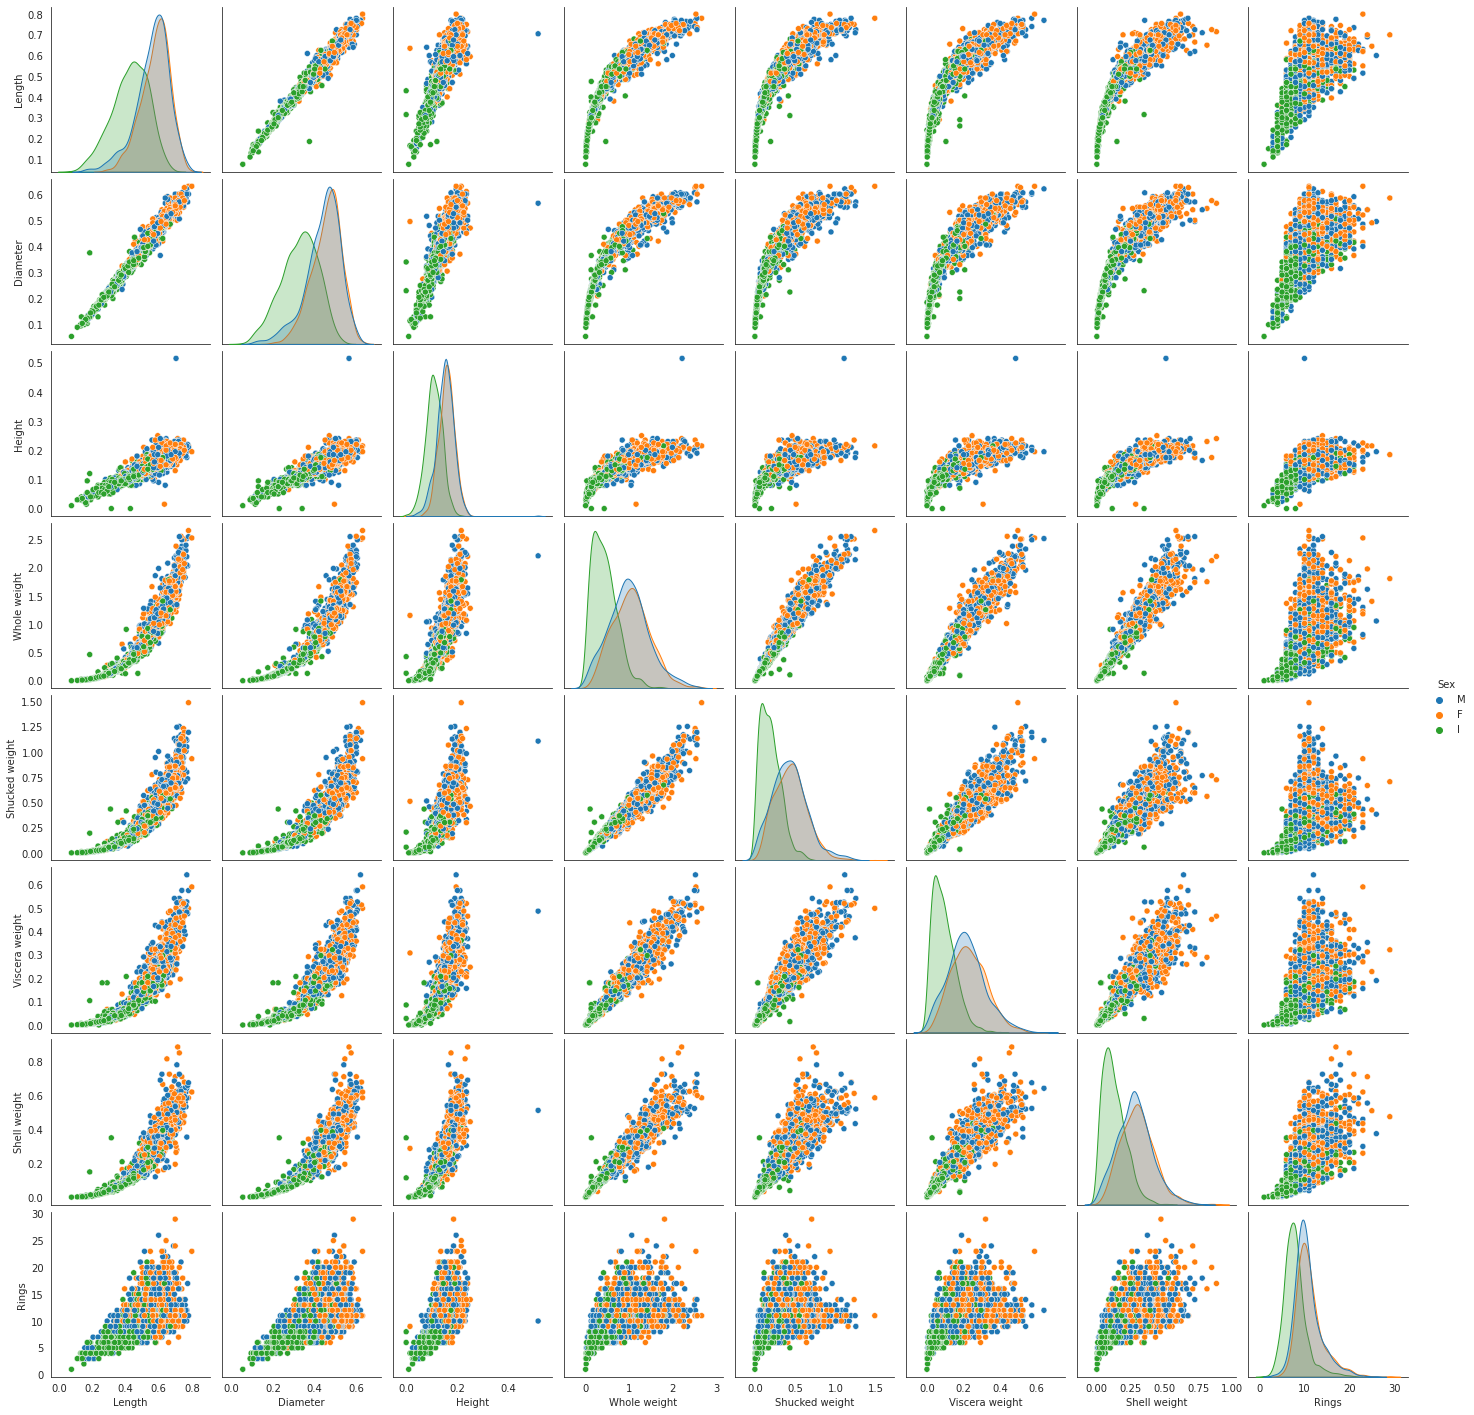

In [30]:
sns.set_style('white')
sns.pairplot(train_df,hue='Sex')
plt.show()

###Dal Pairplot si può vedere che la correlazione con il Target in alcuni punti è abbastanza buona , però  al crescere dei valori delle variabili la dispersione aumenta in modo significativo , si può notare che  valore Sex 'M' e 'F' sono sempre sovrapposti, quindi non sono caratterizzanti,  mentre 'I' si sposta leggermente 

In [31]:
# matrice di correlazione
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986747,0.827554,0.925261,0.897914,0.901283,0.897706,0.556720
Diameter,0.986747,1.000000,0.833662,0.925359,0.893068,0.897766,0.905248,0.574588
Height,0.827554,0.833662,1.000000,0.819221,0.774972,0.797501,0.817338,0.557467
Whole weight,0.925261,0.925359,0.819221,1.000000,0.969405,0.964943,0.955355,0.540390
Shucked weight,0.897914,0.893068,0.774972,0.969405,1.000000,0.931046,0.882617,0.420884
Viscera weight,0.901283,0.897766,0.797501,0.964943,0.931046,1.000000,0.905647,0.500857
Shell weight,0.897706,0.905248,0.817338,0.955355,0.882617,0.905647,1.000000,0.627574
Rings,0.556720,0.574588,0.557467,0.540390,0.420884,0.500857,0.627574,1.000000


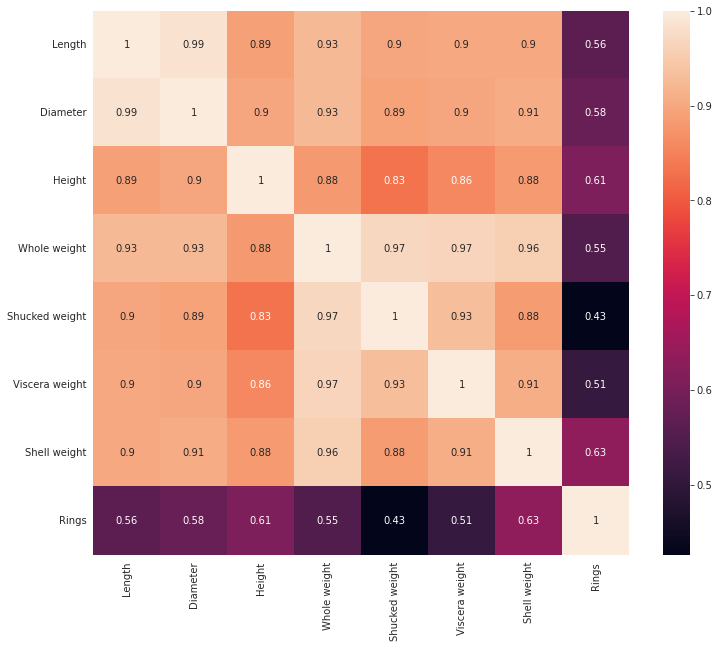

In [32]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(),annot=True);

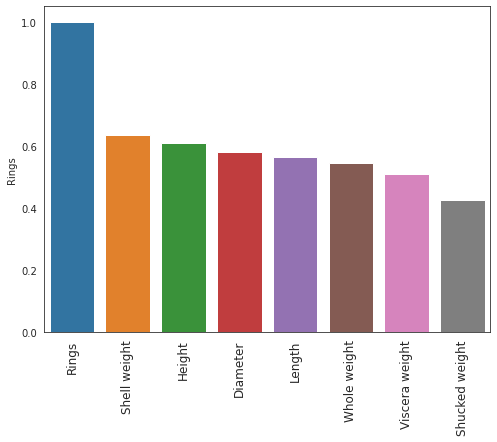

In [33]:
price_corr = train_df.corr() ["Rings"].abs().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

###Si puo vedere che la correlazione delle variabili  con il Target ha un range abbastanza contenuto , si va da 0,42 fino a 0,62

# ASSIGNMENT 4 - DOMANDE

Usare il subsetting sul dataset per tentare di rispondere alle seguenti domande (scrivere anche una riga di spiegazione per ognuna):

4.1 - Quale è la lunghezza media (Lenght) delle conchiglie di sesso maschile (M)?

In [34]:
cond1 =train_df["Sex"]=="M"
train_df[cond1]["Length"].mean()

0.5610358744394615

###La lunghezza media delle conchiglie di sesso maschile è di 0,5610 è  leggermente superiore della media di tutto il dataset che è di 0,5239

4.2 - Pesano mediamente di più le conchiglie di sesso maschile o femminile?

In [35]:
cond4 =train_df["Sex"]=="M"
train_df[cond4]["Whole weight"].mean()

0.9883627802690587

In [36]:
cond2 =train_df["Sex"]=="F"
train_df[cond2]["Whole weight"].mean()

1.0453746238716144

###Mediamente pesano di più le conchiglie di sesso femminile

4.3 - Le conchiglie più vecchie (cioè quelle con più 'Rings') hanno mediamente il diametro più grande di quelle più giovani?

In [37]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [38]:
cond5 =train_df["Rings"]>15
train_df[cond5]["Diameter"].mean()

0.4750253807106596

In [39]:
cond6 =train_df["Rings"]<15
train_df[cond6]["Diameter"].mean()

0.4014433646192741

###Le conchiglie più vecchie hanno mediamente un diametro più grande di quelle più giovani : 0,4750 contro 0,4014

# ASSIGNMENT 5 - PRE-PROCESSING

5.1 - Eseguire eventuali step di pre-processing del dataset, come per esempio la gestione di eventuali valori nulli, la trasformazioni di variabili categoriche e, se necessaria, la normalizzazione

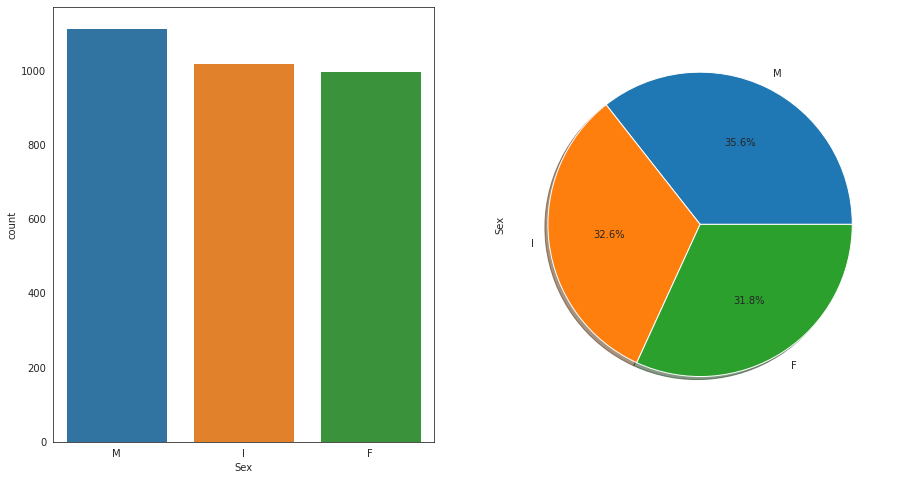

In [40]:
# Variabile Categorica
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.countplot(x='Sex',data=train_df,order = train_df['Sex'].value_counts().index,ax=ax[0])
train_df["Sex"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)

In [41]:
# label encoder con map
train_df['Sex'] = train_df['Sex'].map({'M':0,'F':1,"I":2})

In [42]:
train_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1897,0,0.570,0.415,0.130,0.8800,0.4275,0.1955,0.2380,13
2523,1,0.565,0.440,0.150,0.9830,0.4475,0.2355,0.2485,9
2290,2,0.325,0.270,0.100,0.1850,0.0800,0.0435,0.0650,6
3814,2,0.380,0.275,0.095,0.2425,0.1060,0.0485,0.2100,6
2468,1,0.370,0.275,0.080,0.2270,0.0930,0.0625,0.0700,8
...,...,...,...,...,...,...,...,...,...
989,0,0.575,0.475,0.160,1.1140,0.4955,0.2745,0.2900,9
2527,0,0.595,0.490,0.185,1.1850,0.4820,0.2015,0.3610,10
2952,1,0.645,0.485,0.150,1.1510,0.5935,0.2315,0.2930,12
356,0,0.675,0.525,0.185,1.5870,0.6935,0.3360,0.3950,13


In [43]:
X = train_df[['Length',	'Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight',"Sex"]]
y= train_df["Rings"]

In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model = model.fit(X,y)

In [45]:
importances = pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False)

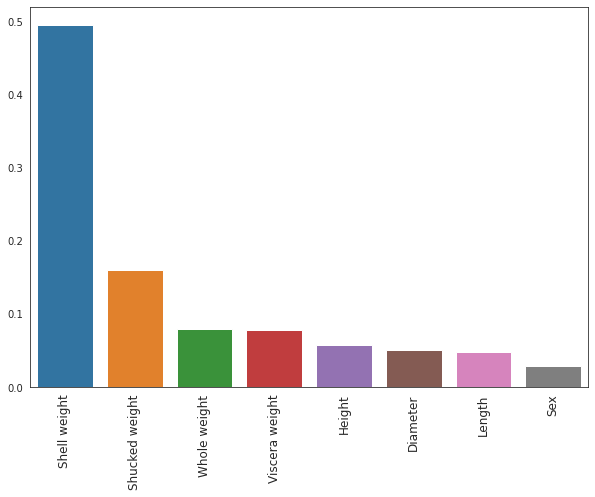

In [46]:
plt.figure(figsize=(10,7))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [47]:
features_list =['Length',	'Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight']

X_train = train_df[features_list].copy()
y_train = train_df['Rings'].copy()

X_test = test_df[features_list].copy()
y_test = test_df['Rings'].copy()

# ASSIGNMENT 6 - LinearRegression

6.1 - Eseguire il fitting di una LinearRegression

In [48]:
### LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import mean_absolute_error, r2_score

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(r2_train)
print(r2_test)

0.544563939957537
0.45706479237693665


6.2 - Valutare le performance sul test set (se necessario, ricordate di riapplicare gli step del pre-processing anche al test-set) utilizzando r2, MAPE e plottando il grafico di 'perfect fit' (actual vs pred)

In [49]:
def evaluate(targets, preds, title, plots=True, verbose=True):
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

TRAIN SET
MAE:  1.5944176019776752
R2:  0.544563939957537


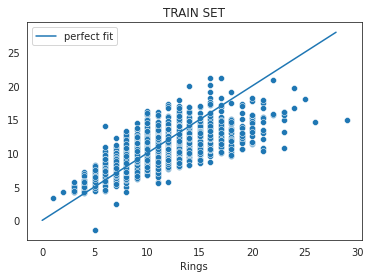

TEST SET
MAE:  1.635133960905169
R2:  0.45706479237693665


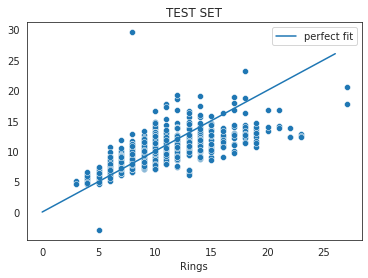

In [50]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

# ASSIGNMENT 7 - RandomForest

7.1 - Allenare un RandomForestRegressor performando una ottimizzazione sui suoi iper-parametri principali (utilizzare RandomizedSearchCV, e come cross validation usare un KFold diviso in 10)

100%|██████████| 19/19 [00:17<00:00,  1.07it/s]


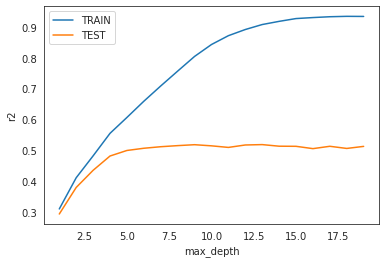

In [51]:
### TUNING max_depth

from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

r2_train_list = list()
r2_test_list = list()
max_depth_range = range(1,20)

for d in tqdm(max_depth_range):
    model = RandomForestRegressor(max_depth=d)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]

plt.plot(max_depth_range, r2_train_list, label='TRAIN')
plt.plot(max_depth_range, r2_test_list, label='TEST')
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.legend()
plt.show()

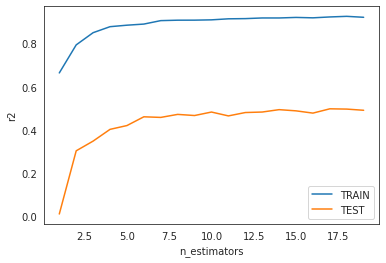

In [52]:
### TUNING n_estimators

r2_train_list = list()
r2_test_list = list()
n_estimators_range = range(1,20)

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]


plt.plot(n_estimators_range, r2_train_list, label='TRAIN')
plt.plot(n_estimators_range, r2_test_list, label='TEST')
plt.xlabel('n_estimators')
plt.ylabel('r2')
plt.legend()
plt.show()

7.2 - Valutare le performance sul test set (se necessario, ricordate di riapplicare gli step del pre-processing anche al test-set) utilizzando r2, MAPE e plottando il grafico di 'perfect fit' (actual vs pred)

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=10), scoring=['r2'], return_train_score=True)

In [54]:
train_r2 = np.mean(results['train_r2'])
test_r2 = np.mean(results['test_r2'])
print('Train r2: ', round(train_r2, 3))
print('Test r2: ', round(test_r2, 3))

Train r2:  0.925
Test r2:  0.516


In [55]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':np.arange(1,10), 
    'max_depth':np.arange(1,10),
    'max_features':['auto', 'sqrt', 'log2'],
    }

model = GridSearchCV(RandomForestRegressor(), param_grid=parameters, cv=KFold(n_splits=10), scoring='r2')

In [56]:
model = model.fit(X_train, y_train)

In [57]:
model.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=9)

In [58]:
model.best_score_

0.544012844693645

# ASSIGNMENT 8 - PipeLine

8.1 Creare una pipeline che unisca tutto quanto fatto sul dataset, usando il RandomForest come regressore, e fittarla ai dati

In [59]:

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

standardize = StandardScaler()
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=7)
regression = RandomForestRegressor(max_depth=6, n_estimators=9)

pipe = Pipeline([
                ('scaler',standardize),
                ('featureselection',rfe),
                ('regression',regression)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=RandomForestRegressor(),
                     n_features_to_select=7)),
                ('regression',
                 RandomForestRegressor(max_depth=6, n_estimators=9))])

8.2 Salvare la pipeline utilizzando joblib

In [60]:
#save pipeline model
import joblib
joblib.dump(pipe,'abalone_new.pkl')

['abalone_new.pkl']